# Pandas Selection Demo
This notebook describes the various ways of selecting rows and columns from a DataFrame.

## Imports

In [12]:
import pandas as pd

## Sample DataFrame

In [13]:
column_names = pd.Index(['apple', 'banana', 'mango', 'peach', 'kiwi'], name='fruit') # column names

row_names = pd.Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], name='letters')  # row names

data = [
    [100, 110, 120, 130, 140],
    [200, 210, 220, 230, 240],
    [300, 310, 320, 330, 340],
    [400, 410, 420, 430, 440],
    [500, 510, 520, 530, 540],
    [600, 610, 620, 630, 640],
    [700, 710, 720, 730, 740],
    [800, 810, 820, 830, 840],
    [900, 910, 920, 930, 940],
]

df = pd.DataFrame(data, columns=column_names, index=row_names)
df

fruit,apple,banana,mango,peach,kiwi
letters,,,,,
a,100,110,120,130,140
b,200,210,220,230,240
c,300,310,320,330,340
d,400,410,420,430,440
e,500,510,520,530,540
f,600,610,620,630,640
g,700,710,720,730,740
h,800,810,820,830,840
i,900,910,920,930,940


## getitem (AKA [ ])
The most direct way to select rows and columns is to use **[ ]**, the _getitem_ operator, on the DataFrame. 

### Selecting columns
Use either **DF['ColumnName']** or **DF.ColumnName**. The second form can only be used if the column name is a valid Python name, consisting only of letters, digits, and underscores.

In [14]:
print(df['apple'])

letters
a    100
b    200
c    300
d    400
e    500
f    600
g    700
h    800
i    900
Name: apple, dtype: int64


In [15]:
print(df.apple)

letters
a    100
b    200
c    300
d    400
e    500
f    600
g    700
h    800
i    900
Name: apple, dtype: int64


To select more than one column, specify a list of column names.

In [16]:
print(df[['banana', 'apple', 'mango']])

fruit    banana  apple  mango
letters                      
a           110    100    120
b           210    200    220
c           310    300    320
d           410    400    420
e           510    500    520
f           610    600    620
g           710    700    720
h           810    800    820
i           910    900    920


### Selecting rows
To select rows by position (0-based), use a slice.

Select the first 5 rows:

In [17]:
df[:'e']

fruit,apple,banana,mango,peach,kiwi
letters,,,,,
a,100,110,120,130,140
b,200,210,220,230,240
c,300,310,320,330,340
d,400,410,420,430,440
e,500,510,520,530,540


Select the fourth through seventh rows:

In [18]:
df[3:7]

fruit,apple,banana,mango,peach,kiwi
letters,,,,,
d,400,410,420,430,440
e,500,510,520,530,540
f,600,610,620,630,640
g,700,710,720,730,740


Select the last three rows.

In [19]:
df[-3:]

fruit,apple,banana,mango,peach,kiwi
letters,,,,,
g,700,710,720,730,740
h,800,810,820,830,840
i,900,910,920,930,940


## Enhanced indexers
**loc** and **iloc** are enhanced indexers which are easy to use. Both take the following form:
DF._indexer_[row-spec, col-spec]
where row-spec can be one row, a list of rows, or a slice of rows. The same is true for columns. To use all rows or columns, use the slice-of-everything (**:**).

### .loc
**DF._loc_[ ]** is used to select both rows and columns by name. It is usually easier to use than plain **DF[ ]**.

In [20]:
print(df.loc['b':'d'])  #  DF.loc[ROW-SLICE]

fruit    apple  banana  mango  peach  kiwi
letters                                   
b          200     210    220    230   240
c          300     310    320    330   340
d          400     410    420    430   440


In [21]:
print(df.loc['b':'d', 'apple':'mango'])  # DF.loc[ROW-SLICE, COLUMN-SLICE]

fruit    apple  banana  mango
letters                      
b          200     210    220
c          300     310    320
d          400     410    420


In [22]:
print(df.loc['b', 'apple':'mango'])  # DF.loc[ROW, COLUMN-SLICE]

fruit
apple     200
banana    210
mango     220
Name: b, dtype: int64


In [23]:
x = df.loc['d','mango']
print(str(x), repr(x), type(x))

420 420 <class 'numpy.int64'>


In [42]:
print(df.loc[:,'mango'].std())
#  DATAFRAME.loc[label-or-slice-or-list, label-or-slice-or-list]

print(df.loc[['b', 'e'], ['banana', 'kiwi']])
df.index = ['a'] * 3 + ['b'] * 3 + ['c'] * 3
print(df.loc['b'])


273.8612787525831
fruit  banana   kiwi
b       410.0  440.0
b       510.0  540.0
b       610.0  640.0
e         NaN    NaN
fruit  apple  banana  mango  peach  kiwi
a        100     110    120    130   140
a        200     210    220    230   240
a        300     310    320    330   340
b        400     410    420    430   440
b        500     510    520    530   540
b        600     610    620    630   640


/Users/jstrick/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


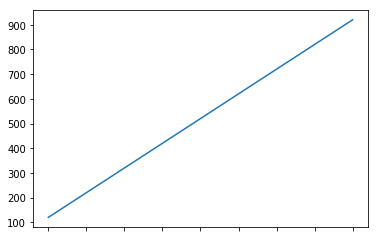

In [43]:
df.loc[:,'mango'].plot()

### .iloc
**DF._iloc_[ ]** is used to select both rows and columns by numerical (positional) index.

In [26]:
df.iloc[3]   # one row, returns Series

fruit
apple     400
banana    410
mango     420
peach     430
kiwi      440
Name: d, dtype: int64

In [27]:
df.iloc[1:4]  # DF.iloc[ROW-SLICE], returns DataFame

fruit,apple,banana,mango,peach,kiwi
letters,,,,,
b,200,210,220,230,240
c,300,310,320,330,340
d,400,410,420,430,440


In [28]:
df.iloc[2, 4]  # DF.iloc[ROW, COLUMN], returns a single value

340

#### Combining .iloc with named columns

In [29]:
df.iloc[4]['apple'] # DF.iloc[ROW][COLUMN]

500

In [30]:
df.iloc[4][['apple', 'mango']]  # df.iloc[row][COLUMN-LIST]

fruit
apple    500
mango    520
Name: e, dtype: int64

In [31]:
df.iloc[4][['mango', 'apple']]  # df.iloc[row][COLUMN-LIST]

fruit
mango    520
apple    500
Name: e, dtype: int64

### .ix
**DF._ix_[ ]** was a convenience shortcut that combined .loc and .iloc and some magic inferences, but it has been deprecated.